<a href="https://colab.research.google.com/github/tomonari-masada/course-nlp2020/blob/master/11_topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# „Éà„Éî„ÉÉ„ÇØ„É¢„Éá„É™„É≥„Ç∞„ÅÆÂÆüË∑µ

* „Éà„Éî„ÉÉ„ÇØ„É¢„Éá„É™„É≥„Ç∞„Çí„ÄÅNMF(nonnegative matrix factorization)„Å®LDA(latent Dirichlet allocation)„Å®„ÅßÂÆüË∑µ„Åó„Å¶„Åø„Çã„ÄÇ
 * LDA„ÅÆÁêÜÂ±à„Å´„Å§„ÅÑ„Å¶„ÅØ„ÄåÁµ±Ë®à„É¢„Éá„É™„É≥„Ç∞Ôºí„Äç„Åß„ÄÇ
* „ÅÑ„Åö„Çå„ÇÇsklearn„ÅÆÂÆüË£Ö„Çí‰Ωø„ÅÜ„ÄÇ
* ÂêÑ„Éà„Éî„ÉÉ„ÇØ„ÅÆ‰∏ä‰ΩçÂçòË™û„ÅØ„ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„ÅßÂèØË¶ñÂåñ„Åô„Çã„ÄÇ

* ÂèÇËÄÉË≥áÊñô
 * https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

## 11-01 „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÊ∫ñÂÇô
* NeurIPS„ÅßÁô∫Ë°®„Åï„Çå„Åü1,740Êú¨„ÅÆË´ñÊñá„ÅÆÊú¨Êñá„Çí‰Ωø„ÅÜ„ÄÇ

### „Éá„Éº„Çø„Çí„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„Åó„É™„Çπ„ÉàÂåñ„Åô„ÇãÈñ¢Êï∞„ÇíÂÆöÁæ©

In [3]:
# import io
# import os.path
# import re
# import tarfile
# import smart_open
 
# # PATH = 'result0604.csv' 
# PATH = './'


# def extract_documents(url='https://cs.nyu.edu/~roweis/data/nips12raw_str602.tgz'):

#   fname = os.path.join(PATH, url.split('/')[-1])

#   if not os.path.isfile(fname):
#     with smart_open.open(url, "rb") as fin:
#       with smart_open.open(fname, 'wb') as fout:
#         while True:
#           buf = fin.read(io.DEFAULT_BUFFER_SIZE)
#           if not buf:
#             break
#           fout.write(buf)

#   with tarfile.open(fname, mode='r:gz') as tar:
#   # Ignore directory entries, as well as files like README, etc.
#     files = [
#              m for m in tar.getmembers()
#              if m.isfile() and re.search(r'nipstxt/nips\d+/\d+\.txt', m.name)
#              ]
#     for member in sorted(files, key=lambda x: x.name):
#       member_bytes = tar.extractfile(member).read()
#       yield member_bytes.decode('utf-8', errors='replace')

* ÂÆüÈöõ„Å´„Éá„Éº„Çø„ÇíÂèñÂæó„Åó„É™„Çπ„ÉàÂåñ„Åô„Çã

In [53]:
import pandas as pd
df = pd.read_csv("./result0605_tweet.csv")

type(df["text"])
docs = df["text"].to_list()

In [4]:
# docs = list(extract_documents())


* ÊñáÊõ∏Êï∞„ÄÅÂÖ∑‰ΩìÁöÑ„Å™ÊñáÊõ∏„ÅÆÂÜÖÂÆπ„Å™„Å©„ÇíÁ¢∫Ë™ç

In [54]:
print(len(docs))

151278


In [55]:
print(docs[0][:1000])

RT @rintaro_maro: Ê≠¥‰ª£ËààË°åÂèéÂÖ•1‰ΩçË®òÂøµüéâ„ÄåÈ¨ºÊªÖ„Ç≠„É£„É©„Åå„Ç∏„Éñ„É™„ÅÆ‰∏ñÁïå„Å´Ë°å„Å£„Åü„Çâ„Äç#È¨ºÊªÖ„ÅÆÂàÉÁÑ°ÈôêÂàóËªäÁ∑®  #ÂçÉ„Å®ÂçÉÂ∞ã https://t.co/ZJWVE54rcn


### spaCy„Çí‰Ωø„Å£„Å¶tokenize„Åô„Çã

* ÂâçÂá¶ÁêÜ„ÅÆÈ´òÈÄüÂåñ„ÅÆ„Åü„ÇÅtagger„Å™„Å©„ÅØÁÑ°Âäπ„Å´„Åó„Å¶„Åä„Åè

In [66]:
import spacy

nlp = spacy.load('en', disable=["tagger", "parser", "ner"])

from transformers import BertJapaneseTokenizer

tknz = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese')



/opt/conda/lib/python3.7/site-packages/graphql/type/directives.py:55: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  assert isinstance(locations, collections.Iterable), 'Must provide locations for directive.'
/opt/conda/lib/python3.7/site-packages/graphql/type/directives.py:62: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  assert isinstance(args, collections.Mapping), '{} args must be a dict with argument names as keys.'.format(name)
/opt/conda/lib/python3.7/site-packages/graphql/type/typemap.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import OrderedDict, Sequence, defaultdict


* Â∞èÊñáÂ≠ó„Å´„Åó„Å¶„Åã„Çâtokenize„Åô„ÇãÈñ¢Êï∞„ÅÆÂÆöÁæ©

In [70]:
# def spacy_lemmatize_text(nlp, text):
#   text = tknz.tokenize(text.lower())
#   doc = [word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text]
#   return [word for word in doc if len(word) > 1] # Èï∑„Åï1„ÅÆÂçòË™û„ÅØÂâäÈô§

tknz.tokenize(doc.lower())

['rt',
 '@',
 '3',
 'r',
 '##j',
 '##y',
 '6',
 'g',
 '##u',
 '9',
 'e',
 '##erc',
 '6',
 'ab',
 ':',
 '„Åä',
 '‰πÖ',
 '##„Åó',
 '##„Å∂„Çä',
 '„Åß„Åô',
 '!!',
 '12',
 'ÊôÇ',
 '„Å´',
 '„ÅÇ„Åí„Çã',
 '„Å§„ÇÇ„Çä',
 '„Åß„Åô',
 '„Åã',
 'Â∞ë„Åó',
 '...',
 '##„Äå',
 'ÊªÖ',
 '„Äç',
 '#',
 'È¨º',
 'ÊªÖ',
 '„ÅÆ',
 'ÂàÉ',
 '#',
 'È¨º',
 'ÊªÖ',
 '„ÅÆ',
 'ÂàÉ',
 'ÁÑ°Èôê',
 'ÂàóËªä',
 'Á∑®',
 '#',
 'ÁÖâ',
 '##ÁçÑ',
 'Êùè',
 'ÂØø',
 '##ÈÉé',
 '#',
 '„Ç§„É©„Çπ„Éà',
 '#',
 '„Ç≥',
 '##„Éî„ÉÉ„ÇØ',
 '#',
 'Áµµ',
 '##Êèè',
 '##„Åç',
 '„Åï„Çì',
 '„Å®',
 'Áπã„Åå„Çä',
 '„Åü„ÅÑ',
 'http',
 '##s',
 '://',
 't',
 '.',
 'co',
 '/',
 'b',
 '##s',
 '42',
 'o',
 '##g',
 '6',
 'f',
 '##v',
 '##f']

* tokenization„ÅÆÂÆüË°å

In [67]:
from tqdm import tqdm

new_docs = list()
for doc in tqdm(docs):
  new_docs.append(tknz.tokenize(doc.lower()))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 151278/151278 [00:56<00:00, 2664.95it/s]


* tokenization„ÅÆÁµêÊûú„ÇíÁ¢∫Ë™ç

In [72]:
print(new_docs[0])

['rt', '@', 'r', '##int', '##ar', '##o', '_', 'm', '##ar', '##o', ':', 'Ê≠¥‰ª£', 'ËààË°å', 'ÂèéÂÖ•', '1', '‰Ωç', 'Ë®òÂøµ', '[UNK]', '„Äå', 'È¨º', 'ÊªÖ', '„Ç≠„É£„É©', '„Åå', '„Ç∏„Éñ', '##„É™', '„ÅÆ', '‰∏ñÁïå', '„Å´', 'Ë°å„Å£', '„Åü„Çâ', '„Äç', '###', 'È¨º', 'ÊªÖ', '„ÅÆ', 'ÂàÉ', 'ÁÑ°Èôê', 'ÂàóËªä', 'Á∑®', '#', 'ÂçÉ', '„Å®', 'ÂçÉ', '##Â∞ã', 'http', '##s', '://', 't', '.', 'co', '/', 'z', '##j', '##w', '##ve', '54', 'r', '##c', '##n']


* ÂêÑÊñáÊõ∏„ÇíÈï∑„ÅÑÊñáÂ≠óÂàó„ÅßË°®„Åó„Å™„Åä„ÅôÔºàCountVectorizer„ÇíÂæå„Åß‰Ωø„ÅÜ„Åü„ÇÅÔºâ

In [73]:
corpus = [' '.join(doc) for doc in new_docs]

In [74]:
corpus[0]

'rt @ r ##int ##ar ##o _ m ##ar ##o : Ê≠¥‰ª£ ËààË°å ÂèéÂÖ• 1 ‰Ωç Ë®òÂøµ [UNK] „Äå È¨º ÊªÖ „Ç≠„É£„É© „Åå „Ç∏„Éñ ##„É™ „ÅÆ ‰∏ñÁïå „Å´ Ë°å„Å£ „Åü„Çâ „Äç ### È¨º ÊªÖ „ÅÆ ÂàÉ ÁÑ°Èôê ÂàóËªä Á∑® # ÂçÉ „Å® ÂçÉ ##Â∞ã http ##s :// t . co / z ##j ##w ##ve 54 r ##c ##n'

## 11-02 „Éá„Éº„ÇøË°åÂàó„ÅÆ‰ΩúÊàê
* NMF„ÅÆÂ†¥Âêà„ÄÅTF-IDF„ÅßÂçòË™û„ÅÆÈáç„Åø„ÇíÊ±Ç„ÇÅ„Å¶ÂêÑÊñáÊõ∏„Çí„Éô„ÇØ„Éà„É´Âåñ„Åô„Çã„ÄÇ
* LDA„ÅÆÂ†¥Âêà„ÄÅÂçò„Å´ÂçòË™û„ÅÆÂá∫ÁèæÈ†ªÂ∫¶„ÇíÈáç„Åø„Å®„Åó„Å¶ÂêÑÊñáÊõ∏„Çí„Éô„ÇØ„Éà„É´Âåñ„Åô„Çã„ÄÇ

### sklearn„ÅÆCountVectorizer„ÅßÁñéË°åÂàóÂåñ„Åô„Çã

* ÂÖ®ÊñáÊõ∏„ÅÆÂçäÂàÜ„Çà„ÇäÂ§ö„ÅÑÊñáÊõ∏„Å´Áèæ„Çå„ÇãÂçòË™û„ÅØ„ÄÅÈ´òÈ†ªÂ∫¶Ë™û„Å®„Åø„Å™„Åó„Å¶ÂâäÈô§„Åô„Çã„ÄÇ
* 10‰ª∂Êú™Ê∫Ä„ÅÆÊñáÊõ∏„Å´„Åó„ÅãÁèæ„Çå„Å™„ÅÑÂçòË™û„ÅØ„ÄÅ‰ΩéÈ†ªÂ∫¶Ë™û„Å®„Åø„Å™„Åó„Å¶ÂâäÈô§„Åô„Çã„ÄÇ

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.5, min_df=10, stop_words='english')
X = vectorizer.fit_transform(corpus)

In [76]:
print(X[0])

  (0, 557)	1
  (0, 349)	2
  (0, 5065)	1
  (0, 5726)	1
  (0, 3868)	1
  (0, 5890)	1
  (0, 2052)	1
  (0, 2287)	1
  (0, 3316)	1
  (0, 5781)	1
  (0, 1342)	1
  (0, 873)	1
  (0, 230)	1


In [77]:
print(vectorizer.get_feature_names())

['00', '000', '001', '007', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '10000', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '1100', '111', '112', '113', '114', '115', '116', '117', '118', '12', '120', '1200', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '1300', '131', '132', '133', '136', '14', '140', '141', '143', '147', '148', '15', '150', '1500', '151', '152', '153', '155', '156', '157', '16', '160', '1600', '161', '163', '164', '165', '1650', '167', '17', '170', '171', '173', '177', '18', '180', '1800', '183', '185', '186', '189', '19', '190', '1900', '1911', '1917', '192', '193', '194', '196', '1971', '1981', '1984', '1985', '1989', '199', '1992', '1996', '1997', '1999', '20', '200', '2000', '2001', '2002', '2005', '2008', '2009', '201', '2010', '2011', '2013', '2015', '2017', '2018', '2019', '202', '2020', '203', '204', '205', '206', '21', '210', '211', '212', '213', '214', '215', '217'

In [78]:
print(len(vectorizer.get_feature_names()))

6426


* ÊñáÊõ∏Êï∞„Å®Ë™ûÂΩô„Çµ„Ç§„Ç∫„ÇíÂ§âÊï∞„Å´„Çª„ÉÉ„Éà

In [79]:
X.shape

(151278, 6426)

In [80]:
n_samples, n_features = X.shape

### TF-IDF„ÅßÂêÑÊñáÊõ∏„Å´„Åä„Åë„ÇãÂçòË™û„ÅÆÈáç„Åø„ÇíË®àÁÆó„Åô„Çã

In [81]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
Xtfidf = tfidf.fit_transform(X)

In [82]:
print(Xtfidf[0])

  (0, 5890)	0.2331961443980187
  (0, 5781)	0.22202515495955544
  (0, 5726)	0.2044122444958422
  (0, 5065)	0.21479072577139283
  (0, 3868)	0.2040573218590239
  (0, 3316)	0.27416224415573653
  (0, 2287)	0.28426850792428743
  (0, 2052)	0.26115441350718094
  (0, 1342)	0.226580715685478
  (0, 873)	0.2761399635932355
  (0, 557)	0.2384650551254131
  (0, 349)	0.5242106846638344
  (0, 230)	0.2886795863302042


In [83]:
Xtfidf.shape

(151278, 6426)

* ÊäΩÂá∫„Åô„Çã„Éà„Éî„ÉÉ„ÇØ„ÅÆÂÄãÊï∞„ÅØ„ÄÅ‰ªäÂõû„ÅØ20ÂÄã„Å®„Åô„Çã„ÄÇ

In [84]:
n_components = 20

## 11-03 NMF„Åß„Éà„Éî„ÉÉ„ÇØÊäΩÂá∫
* „Åæ„Åö„ÄÅTF-IDF„ÅÆ„Éá„Éº„ÇøË°åÂàó„Çí‰Ωø„Å£„Å¶„ÄÄNMF„Å´„Çà„Å£„Å¶„Éà„Éî„ÉÉ„ÇØÊäΩÂá∫„ÇíË©¶„Åø„Çã„ÄÇ
 * NMF„ÅÆ„Éë„É©„É°„Éº„ÇøÁæ§„ÅØ‰∏ãË®ò„Çµ„É≥„Éó„É´„Ç≥„Éº„Éâ„ÅÆ„Åæ„Åæ„ÄÇ
 * https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

### NMF„Å®LDA„ÅÆ„Ç§„É≥„Éù„Éº„Éà

In [85]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

### NMF„Å´„Çà„Çã„Éà„Éî„ÉÉ„ÇØÊäΩÂá∫„ÅÆÂÆüË°å

In [86]:
from time import time

print((f"Fitting the NMF model (generalized Kullback-Leibler "
  f"divergence) with tf-idf features, n_samples={n_samples} "
  f"and n_features={n_features}"))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1, l1_ratio=.5,
          verbose=1)
nmf.fit(Xtfidf)
print(f"done in {time() - t0:0.3f}s.")

Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=151278 and n_features=6426
Epoch 10 reached after 9.351 seconds, error: 1810.469407
Epoch 20 reached after 18.205 seconds, error: 1807.079045
Epoch 30 reached after 27.068 seconds, error: 1806.093237
Epoch 40 reached after 36.003 seconds, error: 1805.683132
Epoch 50 reached after 44.901 seconds, error: 1805.434684
Epoch 60 reached after 53.774 seconds, error: 1805.256507
done in 56.081s.


* NMF„Å´„Åä„Åë„ÇãÂêÑ„Ç≥„É≥„Éù„Éº„Éç„É≥„Éà„ÅØ„ÄÅ„Åù„Çå„Åû„Çå„ÅÆ„Éà„Éî„ÉÉ„ÇØ„Å´„Åä„Åë„ÇãÂçòË™û„ÅÆÈáçË¶ÅÂ∫¶„ÇíË°®„Åô„Éô„ÇØ„Éà„É´„Å®„Åó„Å¶Ë°®Áèæ„Åï„Çå„Å¶„ÅÑ„Çã„ÄÇ

In [87]:
nmf.components_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.89675291e-15, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.63509312e-02, 0.00000000e+00, 3.73107873e-03, ...,
        0.00000000e+00, 0.00000000e+00, 4.81983969e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### „Éà„Éî„ÉÉ„ÇØ„ÅÆÈáçË¶ÅË™û„ÇíÂèñ„ÇäÂá∫„ÅôÈñ¢Êï∞„ÅÆÂÆöÁæ©

In [88]:
def get_top_words(model, feature_names, n_top_words=30):
  top_features = list()
  weights = list()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features.append([feature_names[i] for i in top_features_ind])
    weights.append(topic[top_features_ind])
  return top_features, weights

### NMF„ÅÆÂêÑ„Ç≥„É≥„Éù„Éº„Éç„É≥„Éà„Åã„ÇâÈáçË¶ÅË™û„ÇíÂèñ„ÇäÂá∫„Åô

In [89]:
top_words, weights = get_top_words(nmf, vectorizer.get_feature_names())

In [90]:
print(top_words[0])

['„Ç∑„Éß„Éº', '„Éè„É©', '‰ºöË≠∞', '„Ç≠„É™', '„Éë„ÉØ', 'Ê†º‰ªò„Åë', '„Çà„Çä', 'mi', 'tt', 'ÂÆüÂÜô', 'ube', 'ob', 'ks', 'ÁµÇ‰∫Ü', '„ÉÅ„Çß„ÉÉ„ÇØ', 'Á¨ë„Å£', 'ack', 'al', 'Ë£èÂÅ¥', '„Å¶„Çã', '„Ç≤„Éº„É†', '„Ç≤„Éº„Éà', '„Ç≤„Éº„Ç∏', '„Ç≤„Éº', 'ÈΩãËó§', '„Ç≥„Ç¢', '„Ç≤„É≥', '„Ç≥„Ç≥', '„Ç≥„Çπ', '„Ç≥„Çπ„Éà']


In [91]:
topic_words = [dict(zip(top_words[i], weights[i])) for i in range(n_components)]

In [92]:
topic_words[0]

{'„Ç∑„Éß„Éº': 3.5847286035897015,
 '„Éè„É©': 3.5492900256989626,
 '‰ºöË≠∞': 3.54618070170786,
 '„Ç≠„É™': 3.533446597567353,
 '„Éë„ÉØ': 3.528896204255781,
 'Ê†º‰ªò„Åë': 3.524505770365088,
 '„Çà„Çä': 2.0552202683235263,
 'mi': 1.9807358740163525,
 'tt': 1.8787051328595017,
 'ÂÆüÂÜô': 1.8647925304552941,
 'ube': 1.8615178884244388,
 'ob': 1.8445184923022644,
 'ks': 1.8374944440343703,
 'ÁµÇ‰∫Ü': 1.823947485204348,
 '„ÉÅ„Çß„ÉÉ„ÇØ': 1.796255378854702,
 'Á¨ë„Å£': 1.7886374844893482,
 'ack': 1.781198169720984,
 'al': 1.7733457132655688,
 'Ë£èÂÅ¥': 1.763626630596187,
 '„Å¶„Çã': 1.515139309482898,
 '„Ç≤„Éº„É†': 0.0,
 '„Ç≤„Éº„Éà': 0.0,
 '„Ç≤„Éº„Ç∏': 0.0,
 '„Ç≤„Éº': 0.0,
 'ÈΩãËó§': 0.0,
 '„Ç≥„Ç¢': 0.0,
 '„Ç≤„É≥': 0.0,
 '„Ç≥„Ç≥': 0.0,
 '„Ç≥„Çπ': 0.0,
 '„Ç≥„Çπ„Éà': 0.0}

### ÈáçË¶ÅË™û„Çí„ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„ÅßÂèØË¶ñÂåñ

In [93]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

* „ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„Åã„ÇâÈô§Âéª„Åô„Çã„Çπ„Éà„ÉÉ„Éó„ÉØ„Éº„Éâ„ÇíÁ¢∫Ë™ç„Åô„Çã„ÄÇ

In [94]:
print(STOPWORDS)

{"isn't", 'he', 'k', 'is', 'through', 'that', 'between', 'your', 'not', 'yourselves', 'from', "he'll", "he'd", "where's", 'been', 'or', 'myself', 'its', "when's", 'during', 'with', 'what', "wouldn't", "there's", 'could', 'www', 'again', 'my', 'an', 'does', 'can', 'having', 'had', 'ought', 'off', 'to', "what's", 'whom', 'being', "wasn't", 'then', 'any', 'some', "couldn't", 'are', 'should', 'their', "you'll", "aren't", 'own', "why's", "don't", "i'm", 'ours', 'how', 'which', 'be', "they've", "you're", "you've", 'was', "let's", 'hence', 'were', 'you', 'also', 'until', "they'll", "i've", "haven't", 'therefore', 'themselves', "he's", 'above', 'all', 'cannot', 'they', 'after', "who's", 'did', 'about', "you'd", 'very', 'nor', 'itself', 'few', 'more', 'she', "can't", 'just', "shan't", "shouldn't", "weren't", 'has', 'each', 'me', 'when', 'too', 'out', 'for', "she's", 'further', 'however', 'ourselves', 'than', 'his', "it's", 'else', 'only', 'am', 'because', 'both', 'i', 'in', 'our', 'a', 'up', 't

* „ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„ÇíÊèèÁîª

In [107]:
FONT_PATH = "/usr/share/fonts/opentype/ipaexfont-mincho/ipaexm.ttf"
cloud = WordCloud(stopwords=STOPWORDS,
                  font_path=FONT_PATH,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10'
                  )

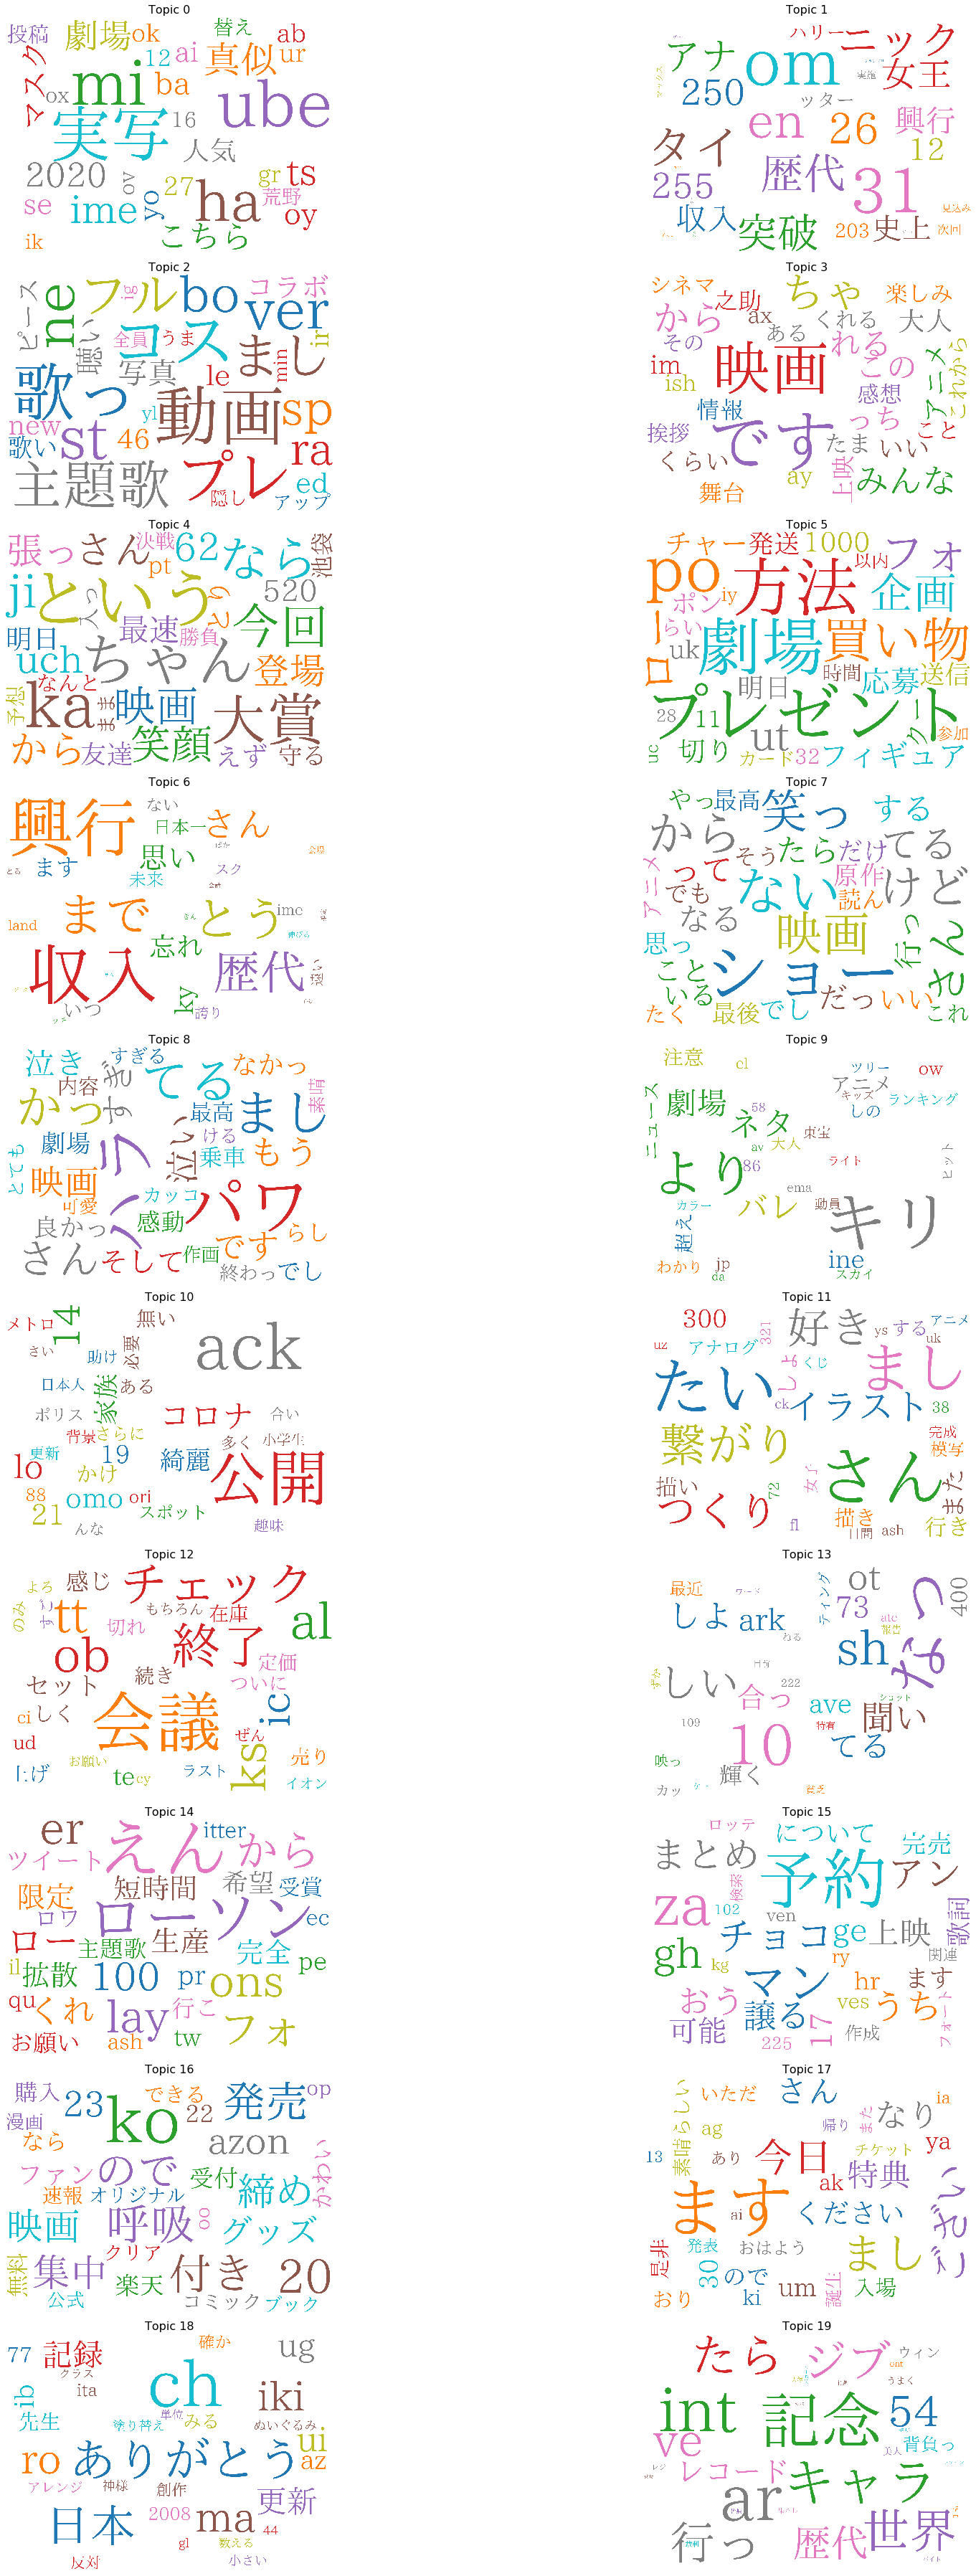

In [110]:
fig, axes = plt.subplots(10, 2, figsize=(32, 50), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
  fig.add_subplot(ax)
  cloud.generate_from_frequencies(topic_words[i], max_font_size=500)
  plt.gca().imshow(cloud)
  plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
  plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()

## 11-04 LDA„Åß„Éà„Éî„ÉÉ„ÇØÊäΩÂá∫

### LDA„Å´„Çà„Çã„Éà„Éî„ÉÉ„ÇØÊäΩÂá∫„ÅÆÂÆüË°å

In [111]:
lda = LatentDirichletAllocation(n_components=n_components, 
                                max_iter=20,
                                topic_word_prior=0.01,
                                learning_method='online',
                                learning_offset=50,
                                batch_size=200,
                                mean_change_tol=1e-4,
                                random_state=1,
                                evaluate_every=1,
                                verbose=1)

TypeError: __init__() got an unexpected keyword argument 'font_path'

In [98]:
print((f"Fitting LDA models with tf features, "
  f"n_samples={n_samples} and n_features={n_features}"))
t0 = time()
lda.fit(X)
print(f"done in {time() - t0:0.3f}s.")

Fitting LDA models with tf features, n_samples=151278 and n_features=6426
iteration: 1 of max_iter: 20, perplexity: 18423.5329
iteration: 2 of max_iter: 20, perplexity: 16544.7155
iteration: 3 of max_iter: 20, perplexity: 15856.2591
iteration: 4 of max_iter: 20, perplexity: 15517.9276
iteration: 5 of max_iter: 20, perplexity: 15318.8312
iteration: 6 of max_iter: 20, perplexity: 15194.1304
iteration: 7 of max_iter: 20, perplexity: 15112.3131
iteration: 8 of max_iter: 20, perplexity: 15053.4236
iteration: 9 of max_iter: 20, perplexity: 15010.7741
iteration: 10 of max_iter: 20, perplexity: 14977.8538
iteration: 11 of max_iter: 20, perplexity: 14951.6648
iteration: 12 of max_iter: 20, perplexity: 14931.3985
iteration: 13 of max_iter: 20, perplexity: 14914.3851
iteration: 14 of max_iter: 20, perplexity: 14900.0689
iteration: 15 of max_iter: 20, perplexity: 14886.2843
iteration: 16 of max_iter: 20, perplexity: 14875.7373
iteration: 17 of max_iter: 20, perplexity: 14866.6117
iteration: 18 of 

### LDA„ÅÆÂêÑ„Éà„Éî„ÉÉ„ÇØ„Åã„ÇâÈ´òÁ¢∫ÁéáË™û„ÇíÂèñ„ÇäÂá∫„Åô

In [99]:
top_words, weights = get_top_words(lda, vectorizer.get_feature_names())

In [100]:
print(top_words[0])

['ube', 'mi', 'ÂÆüÂÜô', 'ha', 'ime', 'ts', 'Áúü‰ºº', 'ÂäáÂ†¥', '2020', '„Åì„Å°„Çâ', 'ba', '„Éû„Çπ„ÇØ', 'oy', 'se', 'yo', 'ai', '‰∫∫Ê∞ó', 'ab', 'ur', '27', 'ok', 'gr', '12', 'ov', 'ox', 'ÊäïÁ®ø', 'ik', '16', 'Êõø„Åà', 'ËçíÈáé']


In [101]:
topic_words = [dict(zip(top_words[i], weights[i])) for i in range(n_components)]

### È´òÁ¢∫ÁéáË™û„Çí„ÉØ„Éº„Éâ„ÇØ„É©„Ç¶„Éâ„ÅßÂèØË¶ñÂåñ

In [112]:
cloud = WordCloud(stopwords=STOPWORDS,
                                font_path=FONT_PATH,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10'
                  )

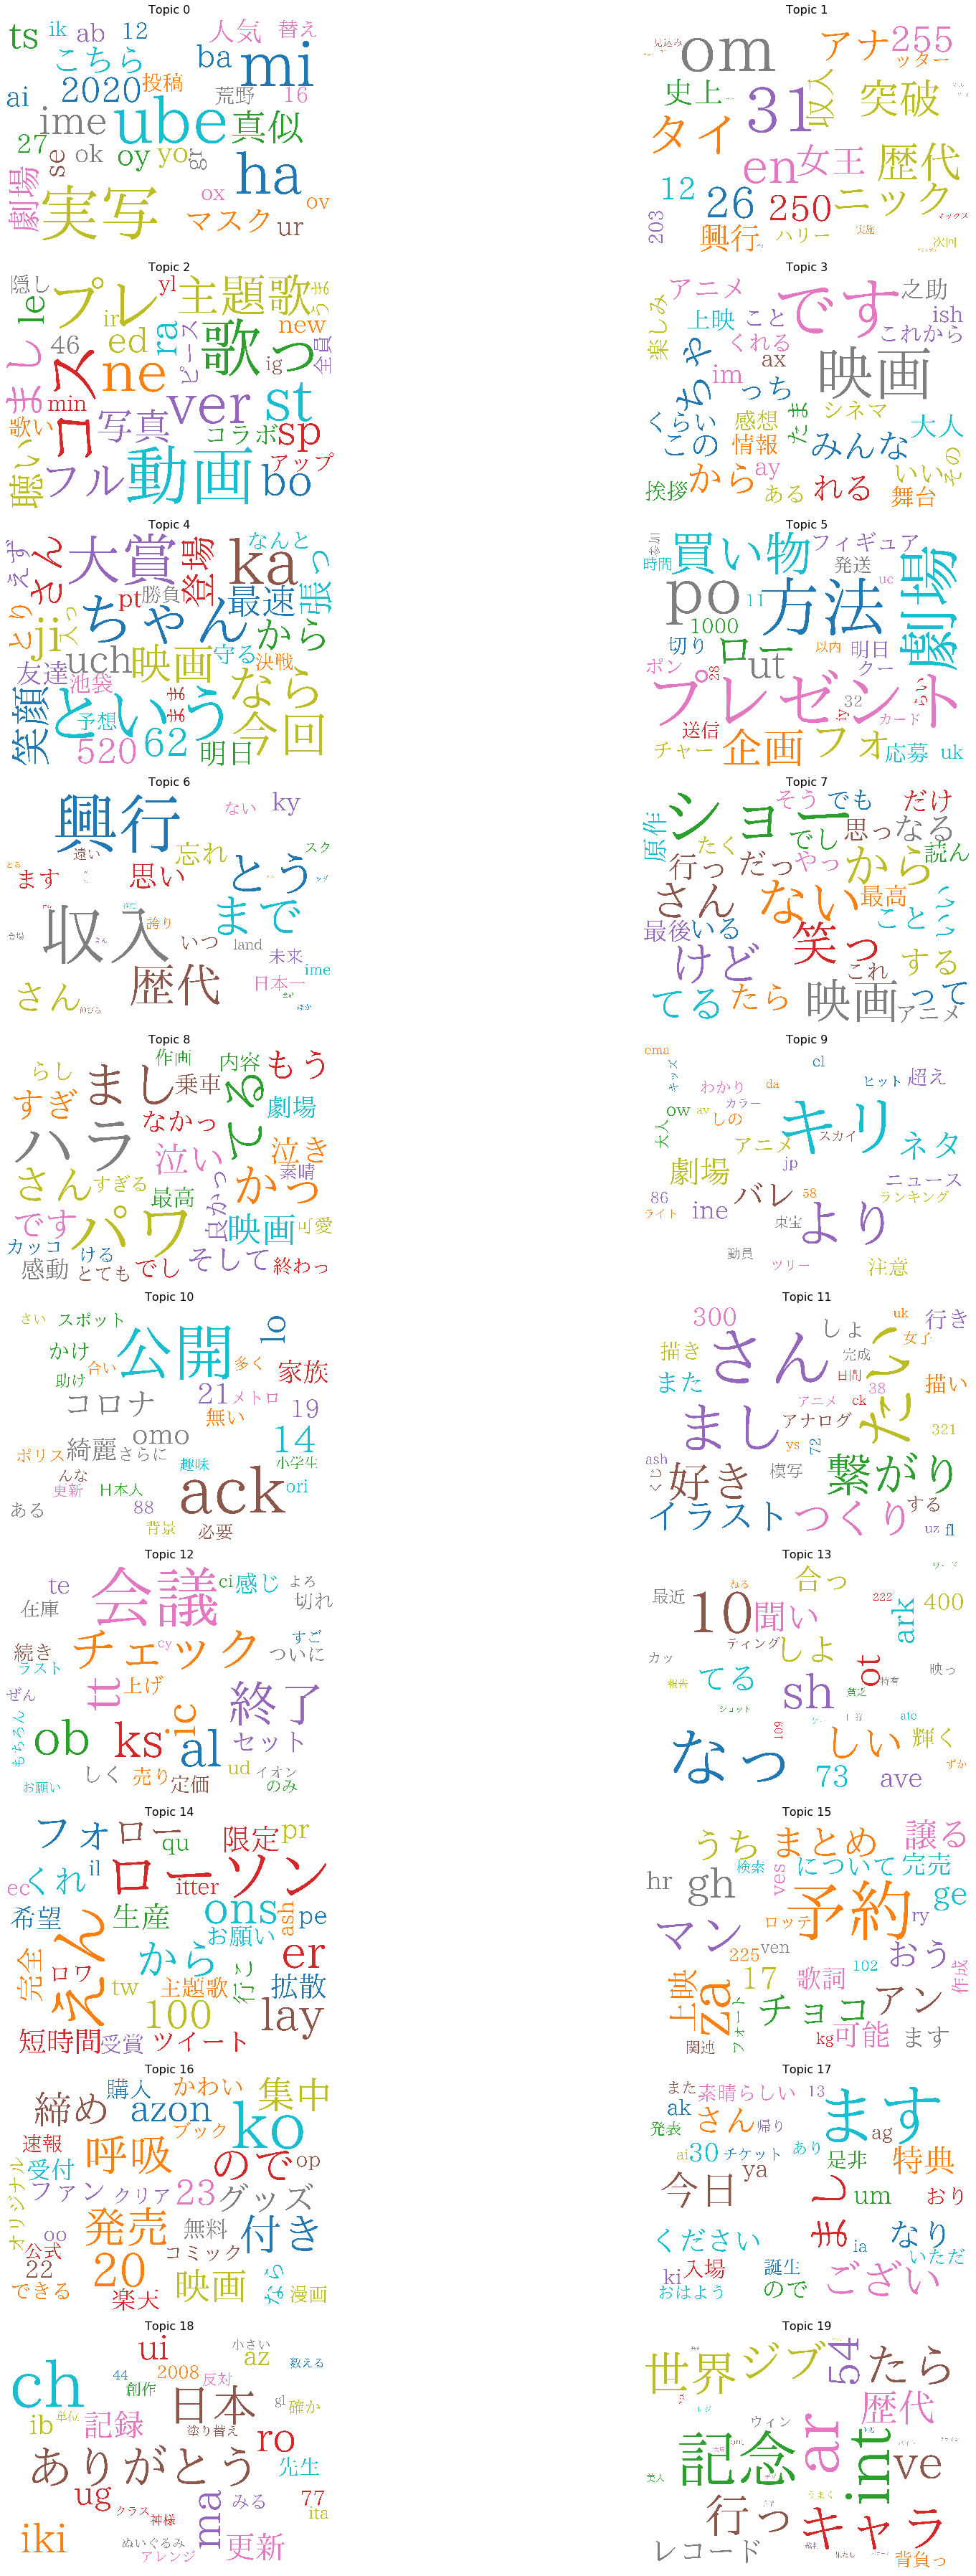

In [114]:
# fig, axes = plt.subplots(5, 4, figsize=(16, 25), sharex=True, sharey=True)
fig, axes = plt.subplots(10, 2, figsize=(32, 50), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
  fig.add_subplot(ax)
  cloud.generate_from_frequencies(topic_words[i], max_font_size=500)
  plt.gca().imshow(cloud)
  plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
  plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()

In [104]:
!pip install pyLDAvis

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [105]:
import pyLDAvis
import pyLDAvis.sklearn

In [106]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, X, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
7      -10.878068   10.538728       1        1  18.568322
8      -60.884026  -75.591820       2        1  10.144487
3       -2.336119  -53.289074       3        1   8.183788
5      -61.385319  -12.914634       4        1   6.551022
0      -28.737743  126.296997       5        1   6.497800
11       1.066606 -123.552811       6        1   6.058402
12      45.140720   -7.947869       7        1   5.779606
17    -140.795975  -98.530548       8        1   5.021558
16      61.531681  -83.240562       9        1   4.400259
2      -72.563057 -140.396881      10        1   4.361891
14      15.984491   63.578186      11        1   4.080996
9     -160.851624   68.945145      12        1   3.566377
6       85.961830   51.922935      13        1   2.917857
4      -99.020836  109.936348      14        1   2.746474
19    -176.764130   -8.681684      15        1   2.570234
1     -117.189880  -37.420200      16        1   2.139360
10     108.829918  -22.946203      17        1   2.117434
18      47.588097  121.934814      18        1   1.618813
13    -106.467834   30.176889      19        1   1.584342
15     -50.613804   59.328842      20        1   1.090976, topic_info=     Term          Freq         Total Category  logprob  loglift
2059   „Ç≠„É™  25749.000000  25749.000000  Default  30.0000  30.0000
1217   „Åï„Çì  51121.000000  51121.000000  Default  29.0000  29.0000
3478   ‰ºöË≠∞  23441.000000  23441.000000  Default  28.0000  28.0000
1631   „Åæ„Åô  25463.000000  25463.000000  Default  27.0000  27.0000
1321   „Åü„ÅÑ  22686.000000  22686.000000  Default  26.0000  26.0000
...   ...           ...           ...      ...      ...      ...
2401   „ÇΩ„Éº    119.951895    120.155459  Topic20  -5.4355   4.5164
2806  „Éï„Ç©„É´    101.450389    101.653953  Topic20  -5.6030   4.5161
3278   ‰∏äÊò†    883.447385   2867.268535  Topic20  -3.4387   3.3408
794    ry    294.071873    882.622230  Topic20  -4.5388   3.4190
1631   „Åæ„Åô    502.374661  25463.661330  Topic20  -4.0032   0.5924

[819 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
6         8  1.000409    03
9         8  0.999212    06
13       19  1.000023    10
14       11  0.999997   100
15        4  1.000012  1000
...     ...       ...   ...
6276      9  0.228390    ÈôêÂÆö
6276     11  0.771503    ÈôêÂÆö
6286     10  0.999454    Èö†„Åó
6295      8  0.128995    ÈõÜ‰∏≠
6295      9  0.871127    ÈõÜ‰∏≠

[901 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 4, 6, 1, 12, 13, 18, 17, 3, 15, 10, 7, 5, 20, 2, 11, 19, 14, 16])